#**Analisis Sentimen OpenSea**

### **Import Data**

In [ ]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

ss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OpenSea_Sentimen/Data_jadinya.csv')
df.head()

,UserName,Score,Komentar,Sentimen
0,Arya Guna,5.0,Mantap gw Dapet ETH Berkat aplikasi ini,Positive
1,Aspani,1.0,KOK NFT SAYA HILANG ATAU BERKURANG.. TIDAK ADA...,Negative
2,Taufik Hidayat,1.0,Tidak bisa listing.....error Jadi tidak bisa j...,Negative
3,Verentia,5.0,Moga dapat duid,Positive
4,Nimin Ardiansyah,1.0,Apk berat lemot tolong di perbaiki admin ™,Negative


In [ ]:
# Melihat dimensi dataset

df.shape

(1043, 4)

In [ ]:
# melihat head dataset

df.head()

,UserName,Score,Komentar,Sentimen
0,Arya Guna,5.0,Mantap gw Dapet ETH Berkat aplikasi ini,Positive
1,Aspani,1.0,KOK NFT SAYA HILANG ATAU BERKURANG.. TIDAK ADA...,Negative
2,Taufik Hidayat,1.0,Tidak bisa listing.....error Jadi tidak bisa j...,Negative
3,Verentia,5.0,Moga dapat duid,Positive
4,Nimin Ardiansyah,1.0,Apk berat lemot tolong di perbaiki admin ™,Negative


In [ ]:
#Melihat Apakah ada Null Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UserName  1043 non-null   object 
 1   Score     1028 non-null   float64
 2   Komentar  1028 non-null   object 
 3   Sentimen  1028 non-null   object 
dtypes: float64(1), object(3)
memory usage: 32.7+ KB


In [ ]:
#Mengecek jumlah data yang tidak bisa dibaca / Null Value
df.isnull().sum()

UserName     0
Score       15
Komentar    15
Sentimen    15
dtype: int64

In [ ]:
#Menghitung Jumlah Sentimen Positif , Negatif dan  Netral hasil Labelling
col_names = ['Sentimen']


for col in col_names:
    
    print(df[col].value_counts())

Positive    731
Negative    211
Neutral      86
Name: Sentimen, dtype: int64


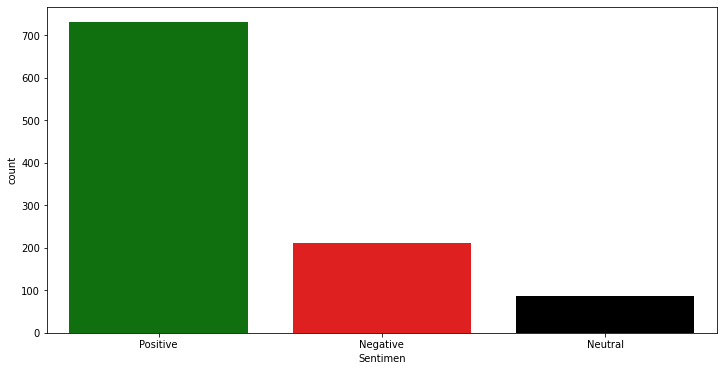

In [ ]:
#visualisasi variabel Sentimen
sentimen_order = df.Sentimen.value_counts().index
plt.figure(figsize=(12, 6))
sns.countplot(
    x="Sentimen",
    data=df,
    order=sentimen_order,
    palette= ['green', 'red', 'black'] + (len(sentimen_order)-1)*["#777777"]
)
plt.grid(False)
plt.show()

### **Preprocessing**

In [ ]:
#Menghapus data NAN
df = df.dropna(how='any')           # assign back
df.dropna(how='any', inplace=True)  # set inplace parameter

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Mengecek kembali jumlah data yang tidak bisa dibaca / Null Value
df.isnull().sum()

UserName    0
Score       0
Komentar    0
Sentimen    0
dtype: int64

In [ ]:
import csv
import pandas as pd
import re
import string
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Library untuk Stemming menggunakan bahasa indonesia
!pip install Sastrawi

     |████████████████████████████████| 209 kB 24.6 MB/s 


In [ ]:
#Import Stopword
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
def pre_process(text):
  #Case Folding Lowercase
  text=text.lower()

  #Case Folding Remove Number
  text = re.sub(r"\d+","",text)

  #Case Folding Removing Punctuation
  text = text.translate(str.maketrans("","",string.punctuation))

  #Case Folding Remove Whitespace
  text = text.strip()

  #Separate Sentence with Split()
  pisah = text.split()

  #Tokenizing
  tokens = nltk.tokenize.word_tokenize(text)

  #Filtering
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  text = stopword.remove(text)

  #Stemming
  from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
  stemmer = StemmerFactory().create_stemmer()
  text = stemmer.stem(text)

  return text

df['Komentar'] = df['Komentar'].apply(lambda x:pre_process(x))
df.head()

,UserName,Score,Komentar,Sentimen
0,Arya Guna,5.0,mantap gw dapet eth berkat aplikasi,Positive
1,Aspani,1.0,kok nft hilang berkurang ada penjelasan pihak ...,Negative
2,Taufik Hidayat,1.0,bisa listingerror jadi bisa jual nft,Negative
3,Verentia,5.0,moga duid,Positive
4,Nimin Ardiansyah,1.0,apk berat lemot di perbaiki admin ™,Negative


In [ ]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(df['Komentar'])
X = cv.transform(df['Komentar'])

y = df['Sentimen']

In [ ]:
words = X

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

NameError: ignored

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

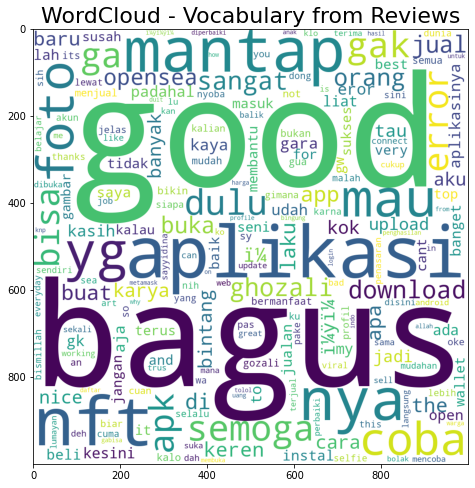

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

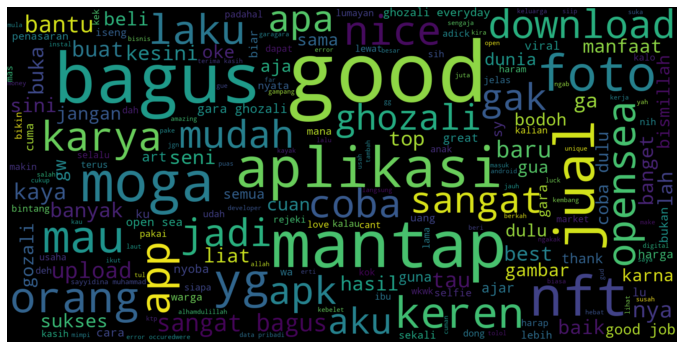

In [ ]:
Positive = df[df.Sentimen == "Positive"]
post_string = []
for t in Positive.Komentar:
    post_string.append(t)
post_string = pd.Series(post_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(post_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

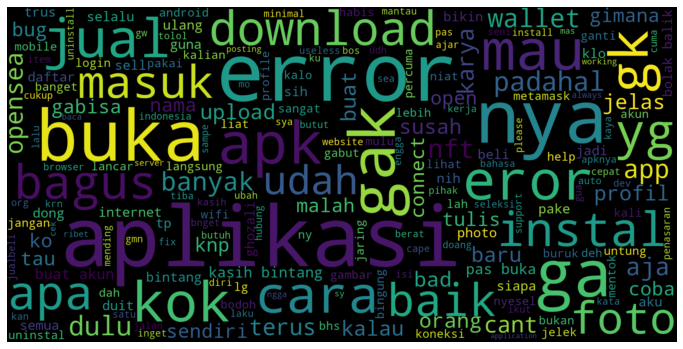

In [ ]:
Negative = df[df.Sentimen == "Negative"] 
Negative_string = []
for t in Negative.Komentar:
    Negative_string.append(t)
Negative_string = pd.Series(Negative_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(Negative_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

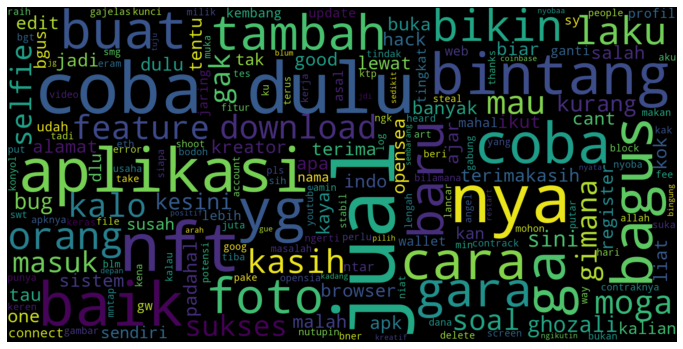

In [ ]:
Neutral = df[df.Sentimen == "Neutral"] 
Neutral_string = []
for t in Neutral.Komentar:
    Neutral_string.append(t)
Neutral_string = pd.Series(Neutral_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(Neutral_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Build Classifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
  sv = SVC(C=c)
  sv.fit(X_train, y_train)
  print('Accuracy for C=%s: %s'
    % (c, accuracy_score(y_test, sv.predict(X_test))))

Accuracy for C=0.01: 0.7233009708737864
Accuracy for C=0.05: 0.7233009708737864
Accuracy for C=0.25: 0.7330097087378641
Accuracy for C=0.5: 0.7427184466019418
Accuracy for C=1: 0.7912621359223301


In [ ]:
model_sv = SVC(C=1)
model_sv.fit(X, y)
print("Accuraccy SVM Adalah : %s" %accuracy_score(y_test, model_sv.predict(X_test)))

Accuraccy SVM Adalah : 0.9466019417475728


              precision    recall  f1-score   support

    Negative       0.97      0.90      0.94        42
     Neutral       1.00      0.60      0.75        15
    Positive       0.94      0.99      0.96       149

    accuracy                           0.95       206
   macro avg       0.97      0.83      0.88       206
weighted avg       0.95      0.95      0.94       206



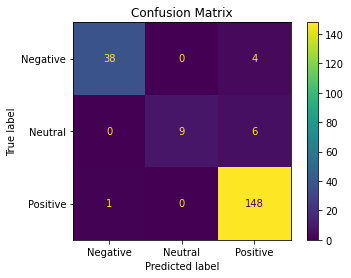

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report


y_pred_en = model_sv.predict(X_test)

print(classification_report(y_test, y_pred_en))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_en)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)
print("Accuraccy Naive Bayes Adalah : %s" %accuracy_score(y_test, model.predict(X_test)))

Accuraccy Naive Bayes Adalah : 0.8349514563106796


              precision    recall  f1-score   support

    Negative       0.95      0.95      0.95        43
     Neutral       1.00      0.41      0.58        17
    Positive       0.93      0.99      0.96       146

    accuracy                           0.94       206
   macro avg       0.96      0.79      0.83       206
weighted avg       0.94      0.94      0.93       206



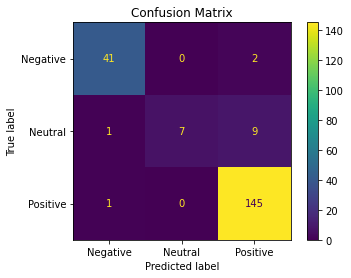

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report


y_pred_el = model.predict(X_test)

print(classification_report(y_test, y_pred_en))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_en)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()